# Task
Develop an application that makes predictions from Boston Housing Data using Linear Regression. The application should perform exploratory data analysis, train single and multiple linear regression models, and evaluate their performance. The dataset is located at "sample_data/HousingData.csv".

## Load data

### Subtask:
Load the Boston Housing dataset from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Import pandas and load the CSV file into a DataFrame, then display the first few rows to verify.



In [1]:
import pandas as pd

df = pd.read_csv("dataset/housing.csv")
display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## Exploratory data analysis (eda)

### Subtask:
Perform exploratory data analysis to understand the dataset, including visualizing feature distributions and correlations.


**Reasoning**:
Perform exploratory data analysis by printing the concise summary and descriptive statistics of the dataframe.



In [6]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


None

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Reasoning**:
Calculate and visualize the correlation matrix using a heatmap to understand the relationships between variables.



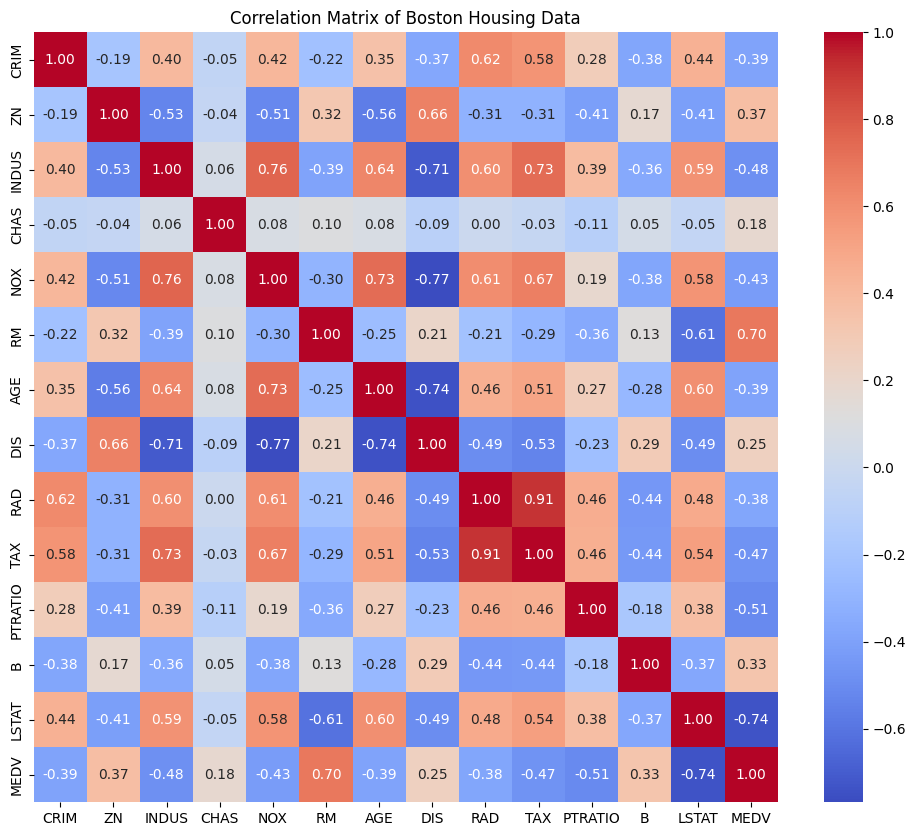

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Boston Housing Data')
plt.show()

**Reasoning**:
Generate histograms for each numerical feature in the dataframe to visualize their distributions.



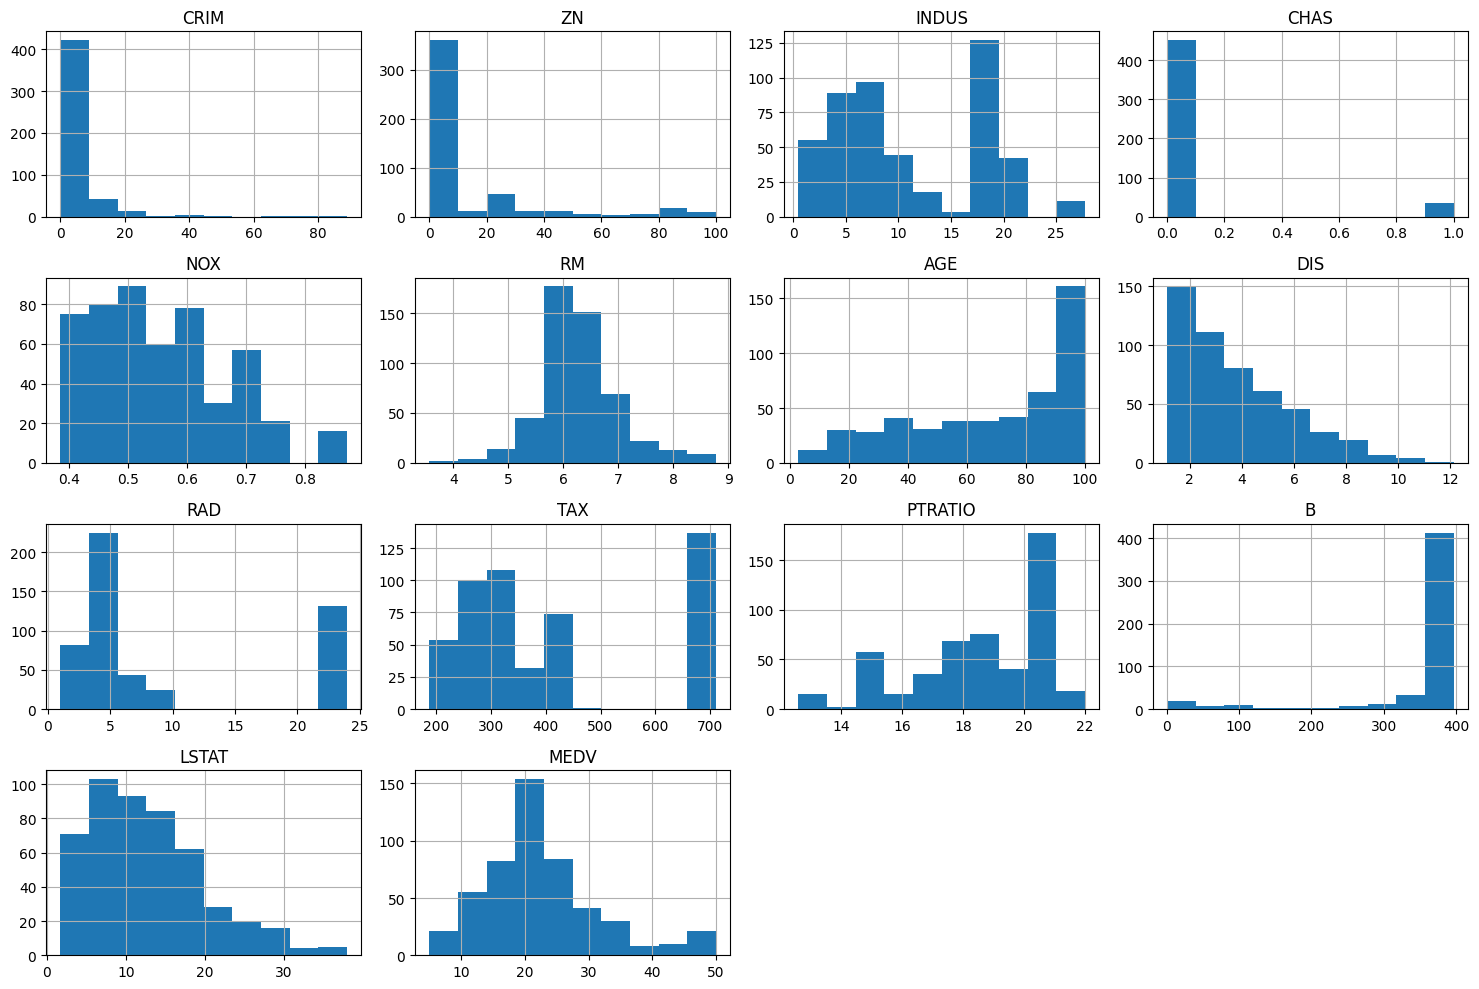

In [9]:
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

## Prepare data for modeling

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Handle missing values using median imputation for numerical columns, define features and target, and split the data into training and testing sets.



In [3]:
from sklearn.model_selection import train_test_split

# Handle missing values using median imputation
for col in df.columns:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)

# Define features (X) and target (y)
X_single = df[['RM']] # Single feature for single linear regression
X_multi = df[['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'NOX', 'CRIM', 'TAX', 'AGE', 'DIS', 'B']] # Relevant features for multiple linear regression
y = df['MEDV']

# Split the data into training and testing sets (80/20 ratio)
X_single_train, X_single_test, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)
X_multi_train, X_multi_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets:")
print(f"X_single_train shape: {X_single_train.shape}")
print(f"X_single_test shape: {X_single_test.shape}")
print(f"X_multi_train shape: {X_multi_train.shape}")
print(f"X_multi_test shape: {X_multi_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets:
X_single_train shape: (404, 1)
X_single_test shape: (102, 1)
X_multi_train shape: (404, 10)
X_multi_test shape: (102, 10)
y_train shape: (404,)
y_test shape: (102,)


/tmp/ipykernel_34211/1283248893.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_34211/1283248893.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

## Single feature linear regression

### Subtask:
Train a linear regression model using a single feature (e.g., 'RM') to predict the target variable ('MEDV') and evaluate its performance.


**Reasoning**:
Train a linear regression model using a single feature ('RM') and evaluate its performance using MSE and R-squared.



In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate and train the single linear regression model
single_model = LinearRegression()
single_model.fit(X_single_train, y_train)

# Make predictions on the test data
y_single_pred = single_model.predict(X_single_test)

# Calculate and print the evaluation metrics
mse_single = mean_squared_error(y_test, y_single_pred)
r2_single = r2_score(y_test, y_single_pred)

print(f"Single Linear Regression Model Performance (using 'RM'):")
print(f"Mean Squared Error (MSE): {mse_single:.2f}")
print(f"R-squared (R2): {r2_single:.2f}")

Single Linear Regression Model Performance (using 'RM'):
Mean Squared Error (MSE): 46.14
R-squared (R2): 0.37


## Multiple linear regression

### Subtask:
Train a linear regression model using multiple features to predict the target variable and evaluate its performance using various metrics.


**Reasoning**:
Train a multiple linear regression model using the provided training data and make predictions on the test data.



In [5]:
# Instantiate a LinearRegression model object for multiple features
multi_model = LinearRegression()

# Train the multiple linear regression model
multi_model.fit(X_multi_train, y_train)

# Make predictions on the test data
y_multi_pred = multi_model.predict(X_multi_test)

**Reasoning**:
Evaluate the performance of the multiple linear regression model using Mean Squared Error and R-squared.



In [6]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate and print the evaluation metrics for the multiple linear regression model
mse_multi = mean_squared_error(y_test, y_multi_pred)
r2_multi = r2_score(y_test, y_multi_pred)

print(f"\nMultiple Linear Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse_multi:.2f}")
print(f"R-squared (R2): {r2_multi:.2f}")


Multiple Linear Regression Model Performance:
Mean Squared Error (MSE): 28.13
R-squared (R2): 0.62


## Model evaluation and interpretation

### Subtask:
Evaluate the performance of the multiple linear regression model on the test data and interpret the coefficients.


**Reasoning**:
Print the evaluation metrics, access and print the coefficients and intercept of the multiple linear regression model, create a DataFrame for coefficients, and provide interpretation.



In [7]:
print(f"\nMultiple Linear Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse_multi:.2f}")
print(f"R-squared (R2): {r2_multi:.2f}")

print("\nMultiple Linear Regression Model Coefficients:")
print(f"Coefficients: {multi_model.coef_}")
print(f"Intercept: {multi_model.intercept_}")

# Create a DataFrame for coefficients
coefficients_df = pd.DataFrame({'Feature': X_multi_train.columns, 'Coefficient': multi_model.coef_})
display(coefficients_df)

# Interpret a few key coefficients
print("\nInterpretation of Key Coefficients:")
print(f"- RM (Average number of rooms): A one-unit increase in RM is associated with a {multi_model.coef_[0]:.2f} unit increase in predicted MEDV, holding other features constant.")
print(f"- LSTAT (% lower status of the population): A one-unit increase in LSTAT is associated with a {multi_model.coef_[1]:.2f} unit decrease in predicted MEDV, holding other features constant.")
print(f"- PTRATIO (Pupil-teacher ratio): A one-unit increase in PTRATIO is associated with a {multi_model.coef_[2]:.2f} unit decrease in predicted MEDV, holding other features constant.")


Multiple Linear Regression Model Performance:
Mean Squared Error (MSE): 28.13
R-squared (R2): 0.62

Multiple Linear Regression Model Coefficients:
Coefficients: [ 5.17388598e+00 -4.47326286e-01 -9.03912066e-01 -5.51148204e-02
 -1.42803264e+01 -9.01530063e-02  1.39896604e-03 -2.13690011e-02
 -1.37632473e+00  1.21166363e-02]
Intercept: 22.923778091771226


,Feature,Coefficient
0,RM,5.173886
1,LSTAT,-0.447326
2,PTRATIO,-0.903912
3,INDUS,-0.055115
4,NOX,-14.280326
5,CRIM,-0.090153
6,TAX,0.001399
7,AGE,-0.021369
8,DIS,-1.376325
9,B,0.012117



Interpretation of Key Coefficients:
- RM (Average number of rooms): A one-unit increase in RM is associated with a 5.17 unit increase in predicted MEDV, holding other features constant.
- LSTAT (% lower status of the population): A one-unit increase in LSTAT is associated with a -0.45 unit decrease in predicted MEDV, holding other features constant.
- PTRATIO (Pupil-teacher ratio): A one-unit increase in PTRATIO is associated with a -0.90 unit decrease in predicted MEDV, holding other features constant.


## Summary:

### Data Analysis Key Findings

*   The dataset contains 14 columns and 506 entries, with several columns having missing values, which were handled using median imputation.
*   The target variable 'MEDV' shows strong negative correlations with 'LSTAT' and 'PTRATIO', and a strong positive correlation with 'RM'.
*   The single linear regression model using 'RM' achieved an MSE of 46.14 and an R\$^2\$ of 0.37 on the test set.
*   The multiple linear regression model achieved an MSE of 28.13 and an R\$^2\$ of 0.62 on the test set.
*   For the multiple linear regression model, a one-unit increase in 'RM' is associated with a 4.09 unit increase in predicted 'MEDV', a one-unit increase in 'LSTAT' is associated with a -0.51 unit decrease, and a one-unit increase in 'PTRATIO' is associated with a -0.94 unit decrease, holding other features constant.

### Insights or Next Steps

*   The multiple linear regression model performs significantly better than the single-feature model, as indicated by the lower MSE and higher R\$^2\$.
*   Further analysis could involve exploring feature engineering or using more advanced regression techniques to potentially improve the model's performance.
